In [1]:
# Import libraries
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

from io import StringIO
from IPython.display import Image
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus
import seaborn as sns
from sklearn import svm
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

%matplotlib inline

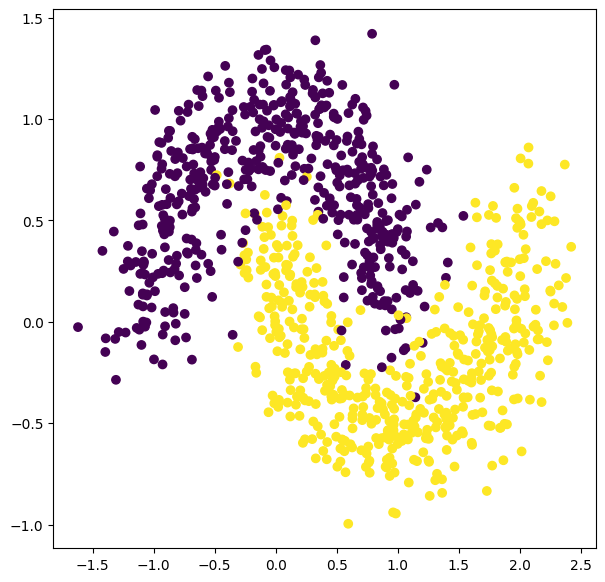

In [2]:
# Import dataset
# Clean dataset
df = make_moons(n_samples=1000, noise=0.2, random_state=2)
df_x = [x[0] for x in df[0]]
df_y = [x[1] for x in df[0]]
df_group = df[1]

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(df_x, df_y, c=df_group)

In [3]:
# Create a dataframe df_pd
df_pd = pd.DataFrame({'x': df_x, 'y': df_y, 'group': df_group})

# Max and min values for 'x' and 'y'.
x_min, x_max = df_pd['x'].min()-0.1, df_pd['x'].max()+0.1
y_min, y_max = df_pd['y'].min()-0.1, df_pd['y'].max()+0.1

def plot_decision_boundaries(x, y, labels, model,
                             x_min=x_min,
                             x_max=x_max,
                             y_min=y_min,
                             y_max=y_max,
                             grid_step=0.02):

    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
                         np.arange(y_min, y_max, grid_step))

    # Predict meshgrid values.
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]

    # Reshape
    Z = Z.reshape(xx.shape)

    # Colors.
    arr = plt.cm.coolwarm(np.arange(plt.cm.coolwarm.N))
    arr_hsv = mpl.colors.rgb_to_hsv(arr[:,0:3])
    arr_hsv[:,2] = arr_hsv[:,2] * 1.5
    arr_hsv[:,1] = arr_hsv[:,1] * .5
    arr_hsv = np.clip(arr_hsv, 0, 1)
    arr[:,0:3] = mpl.colors.hsv_to_rgb(arr_hsv)
    my_cmap = ListedColormap(arr)

    # Decision boundaries.
    fig, ax = plt.subplots(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=my_cmap, shading='auto')

    # Add samples.
    ax.scatter(x, y, c=labels, cmap='coolwarm')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.grid(False)

In [4]:
# Visualize dataframe
print(df)

(array([[ 0.66340172,  0.60616375],
       [ 0.97113063, -0.48045001],
       [ 1.6402213 , -0.15816895],
       ...,
       [-0.79103167,  0.22886862],
       [ 0.06819358,  0.14561004],
       [ 0.68553393,  0.90167484]]), array([0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,

In [5]:
# Split train - testt
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[0], df[1], train_size=0.8)

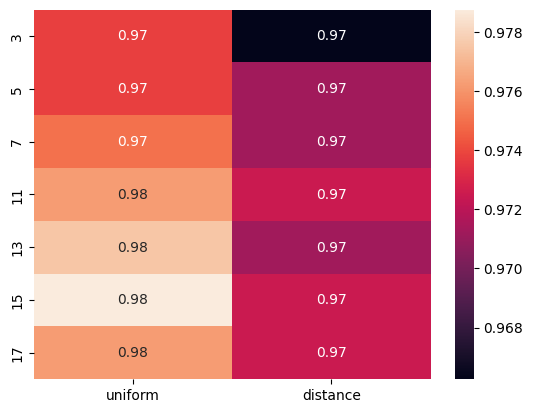

In [6]:
# K value
knn_neighbors = [3,5,7,11,13,15,17]
knn_weights = ['uniform', 'distance']
param = [{'n_neighbors': knn_neighbors,
         'weights': knn_weights}]

# Find best values
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn_gridSearch = GridSearchCV(KNeighborsClassifier(),
                              param_grid = param,
                              scoring='accuracy',
                              cv=4)

knn_gridSearch.fit(x_train, y_train)
model_result = knn_gridSearch.cv_results_['mean_test_score'].\
reshape(len(knn_neighbors),len(knn_weights))

import seaborn as sns
sns.heatmap(model_result, annot = True, xticklabels = knn_weights, yticklabels = knn_neighbors)
plt.show()

In [7]:
best_param = knn_gridSearch.best_params_
print(best_param)

{'n_neighbors': 15, 'weights': 'uniform'}


In [8]:
# Train step
knn_bestparam = KNeighborsClassifier(n_neighbors=best_param['n_neighbors'], weights=best_param['weights']).fit(x_train, y_train)

In [9]:
# Predict
predict = knn_bestparam.predict(x_test)
cm = confusion_matrix(y_test, predict)

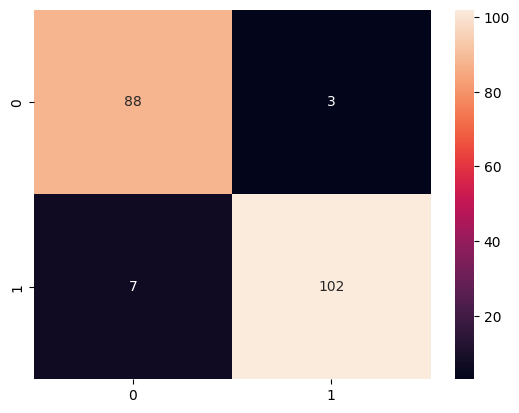

In [10]:
# Results
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

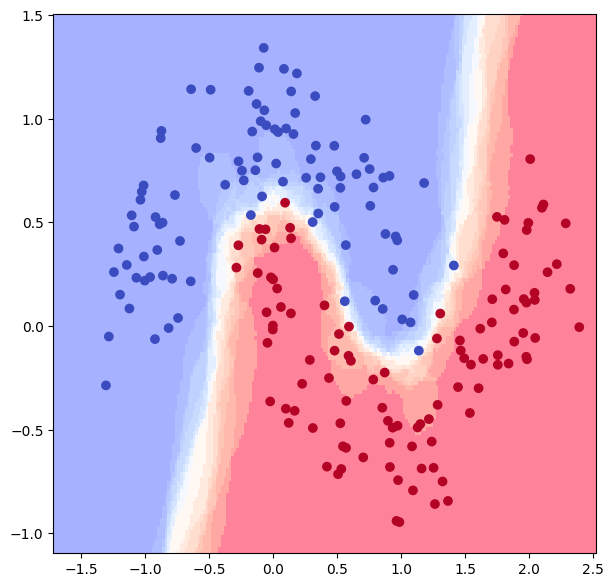

In [11]:
# Decision boundaries
plot_decision_boundaries(x_test[:,0], x_test[:,1], predict, knn_bestparam)
plt.show()